# Tarea Semanal 2: Algoritmo para calcular la DFT
## Magdalena Noé
Se desarrollo un algoritmo que calcula la transformada discreta de Fourier (DFT) de una señal otorgada.
Para ello se implementan 2 fors anidados que recorren cada valor de la señal y calculan la sumatoria X[n] * e^fase siendo e^fase el termino conocido como twiddle factor.

### Parametros
- xx : señal de entrada a la cual se desea calcular su DFT

### Retorna
- XX : matriz DFT de igual dimension que la señal de entrada

#### Librerias:

In [17]:
import numpy as np
import matplotlib.pylab as plt

# mi_funcion_DFT

In [18]:
def mi_funcion_DFT(xx):
    xx = np.asarray(xx, dtype=float).flatten()  # Asegura vector 1D real
    len_xx = len(xx)
    XX = np.zeros(len_xx, dtype=complex) # Inicializo arr con ceros

    for k in range(len_xx): # Pasa por cada valor de la señal (k = 0, N-1)
        for n in range(len_xx): # n de la sumatoria (n = 0, N-1)
            fase = -2j * np.pi * k * n / len_xx # e^fase = cos(2*pi*(kn/N)) + j*sin(2*pi*(kn/N)) = "twiddle factor"
            XX[k] += xx[n] * np.exp(fase) # Sumatoria: X[n] * e^fase

    return XX

# Testeo
Alimentaremos una señal seno a la función y graficaremos el resultado

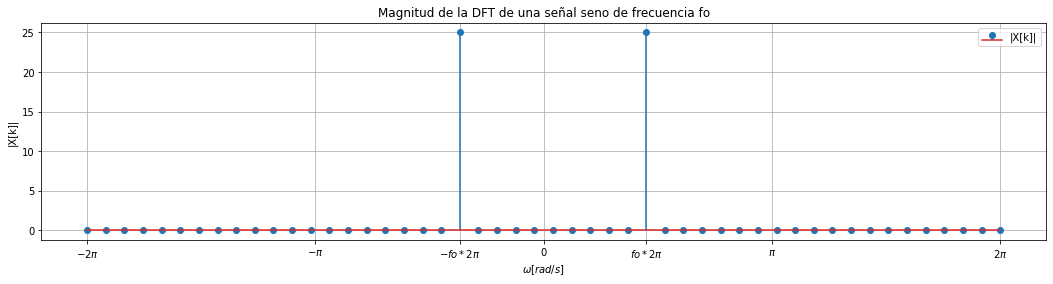

In [19]:
def mi_funcion_sen(vmax=1,dc=0,ff=1,ph=0,nn=1000,fs=1000):
    t = np.arange(nn) / fs
    sin = vmax * np.sin(t*2*np.pi*ff + ph) + dc
    return t, sin

#------------------------------------------------------

N = 50  # Muestras del ADC
fs = N  # Frecuencia de muestreo del ADC
f0 = 5  # Frecuencia de la señal seno
t, xx = mi_funcion_sen(nn = N, fs = fs, ff=f0)

XX = mi_funcion_DFT(xx)

mi_grafico(XX, N, f0, "Magnitud de la DFT de una señal seno de frecuencia fo")

### Introduciendo ruido
Ahora modifiquemos la señal para añadir ruido uniforme con varianza igual a 4

σ^2 = (b−a)^2 / 12

σ^2 = 4 ⇒ (b−a)^2 = 48 ⇒ b−a= 48^1/2

​Plantearemos ruido simetrico por lo que a = b

Aplicaremos la DFT tanto a una seno con el ruido y la señal ruido pura, siendo esta una señal aleatoria.

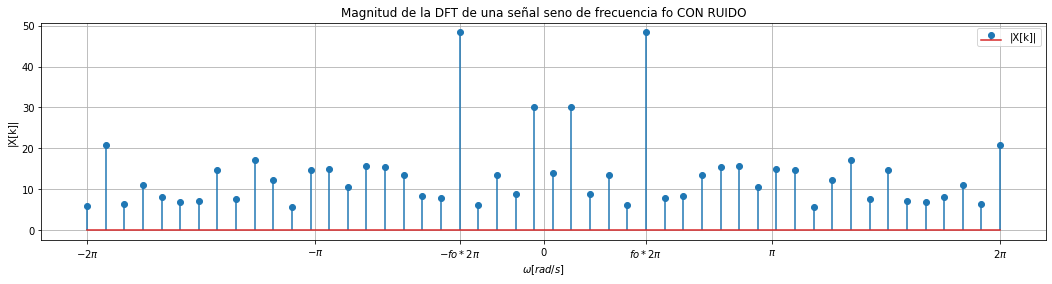

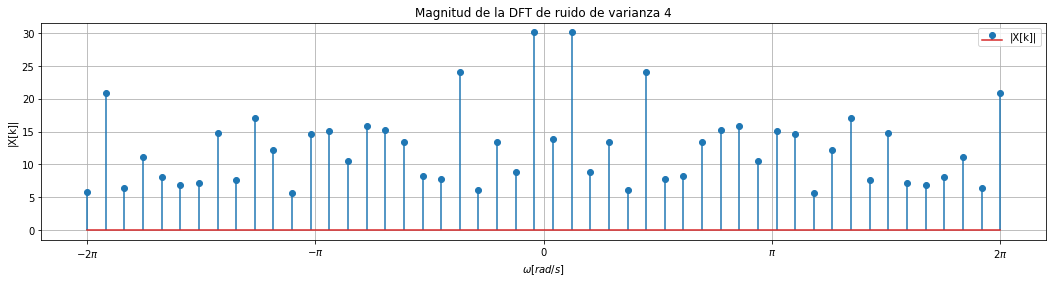

In [20]:
ruido = (np.random.random_sample(size=t.shape) - 0.5) * np.sqrt(48)
xx_con_ruido = xx + ruido

XX_sen_ruido = mi_funcion_DFT(xx_con_ruido)
XX_ruido = mi_funcion_DFT(ruido)

mi_grafico(XX_sen_ruido, N, f0, "Magnitud de la DFT de una señal seno de frecuencia fo CON RUIDO")
mi_grafico(XX_ruido, N, titulo="Magnitud de la DFT de ruido de varianza 4")

# FFT (Fast Fourier Transform)
Repetiremos los experimentos pero reemplazaremos el uso de la DFT con la FFT

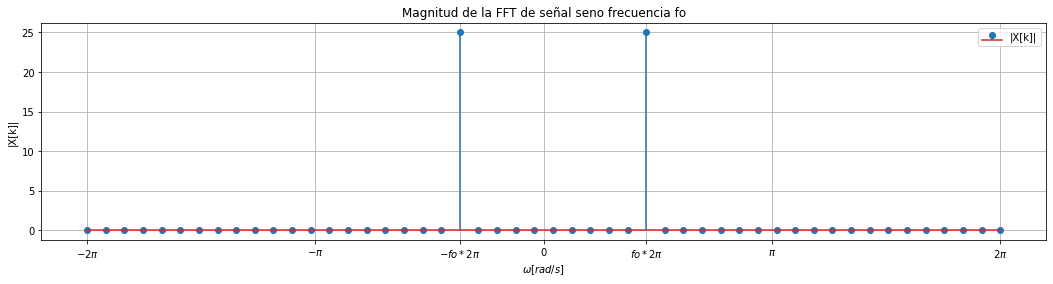

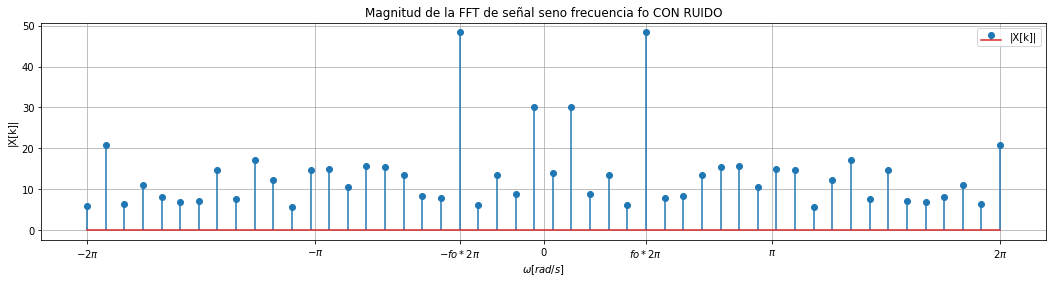

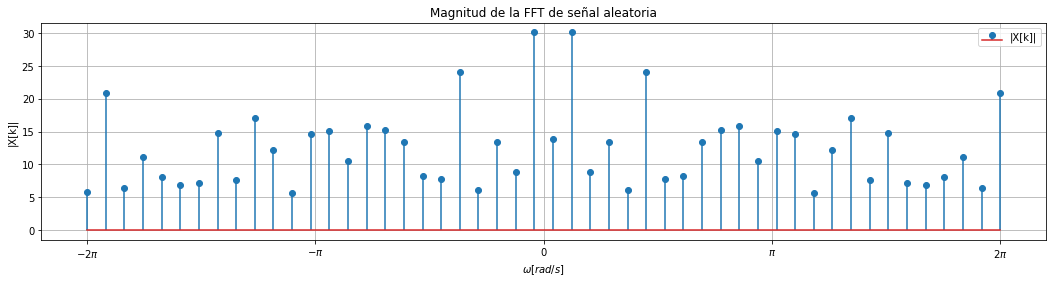

In [21]:
XX_fft = np.fft.fft(xx) # Invoco FFT en vez de DFT
XX_fft_sen_ruido = np.fft.fft(xx_con_ruido) # Introduzco ruido
XX_fft_ruido = np.fft.fft(ruido) # Señal aleatoria (ruido puro)

mi_grafico(XX_fft, N, f0, "Magnitud de la FFT de señal seno frecuencia fo")
mi_grafico(XX_fft_sen_ruido, N, f0, "Magnitud de la FFT de señal seno frecuencia fo CON RUIDO")
mi_grafico(XX_fft_ruido, N, titulo="Magnitud de la FFT de señal aleatoria")

#### Generacion de gráficos
Para mejorar la lectura del codigo se desarrollo una funcion aparte para realizar los graficos.
Una linea de codigo destacable es el shifteo de la mitad de la matriz XX (DFT de la señal) para graficar las frecuencias correspondientes en el eje negativo.

In [22]:
def mi_grafico(XX, N, f0=0, titulo=""):
    XX = np.roll(XX, N // 2) # Shifteo

    k = np.linspace(-2 * np.pi, 2 * np.pi, N) # Eje de frecuencias de -2pi a 2pi
    wo_pos = k[N // 2 + f0] # Posicion del delta positivo
    wo_neg = k[N // 2 - f0] # Posicion del delta positivo

    plt.figure(figsize=(18, 4))
    plt.stem(k, np.abs(XX), use_line_collection=True, label="|X[k]|") # grafico para funciones discretas
    plt.title(titulo)
    plt.xlabel(r"${\omega}  [rad/s]$")
    plt.ylabel("|X[k]|")
    plt.grid(True)

    # Destaco valores importantes sobre el eje de radianes (0, pi, 2pi, wo y sus negativos)
    if(f0 == 0): # En caso de que la señal no tenga frecuencia fundamental
        x_ticks = [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]
        x_labels = [r"$-2\pi$", r"$-\pi$", "0", r"$\pi$", r"$2\pi$"]
    else:
        x_ticks = [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi, wo_pos, wo_neg]
        x_labels = [r"$-2\pi$", r"$-\pi$", "0", r"$\pi$", r"$2\pi$", r"$fo*2\pi$", r"$-fo*2\pi$"]

    plt.xticks(x_ticks, x_labels)

    plt.legend()
    plt.show()